# Estudo de caso - Diabetes dos Índios Pima - Parte 05

## Finalizando o projeto - Análise dos Dados

### Instalando e Carregando os pacotes e o Dataset limpo


In [13]:
# imports
import pandas as pd
import numpy as np

# para plotagem dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# para geração aleatoria de cores nos gráficos
import random
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'turbo', 'twilight']

# Filtrar as mensagens de alerta (deixar o notebook limpo)
import warnings
warnings.filterwarnings("ignore")

# Criando uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "NA", "undefined"]

# Carregando o Dataset
dataset = pd.read_csv("data/dataset_parte4.csv", na_values = lista_labels_valores_ausentes)

In [14]:
dataset.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,1.200,33,1


In [15]:
# Como o arquivo salvo não possuia id, ao sarvar o arquivo, o pandas cria uma nova coluna de identificação e ele chama de Unnamed:0 
# Removendo essa coluna
dataset.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [16]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,1.200,33,1


## Análise Exploratória dos Dados (EDA: Exploratory Data Analysis)

#### Distribuição dos Dados

In [17]:
px.pie(dataset, names="Outcome")

Podemos ver que no dataset existem 65,1% das pessoas não tem diabetes e 35,9% têm.

#### Gravidez vs Outcome (possuem ou não diabetes)

<Axes: xlabel='Pregnancies', ylabel='count'>

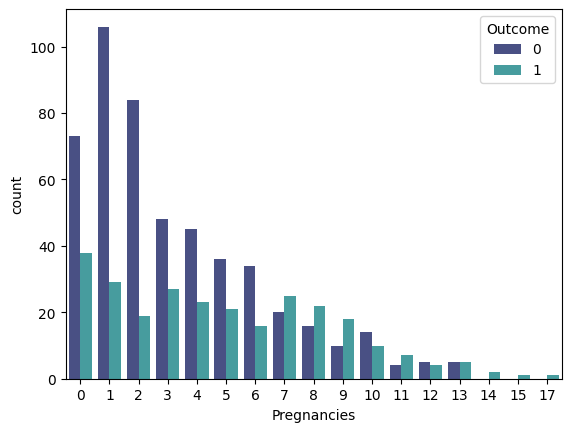

In [18]:
sns.countplot(x="Pregnancies", hue = "Outcome", data=dataset, palette=random.choice(pallete))

<Axes: xlabel='Pregnancies', ylabel='Count'>

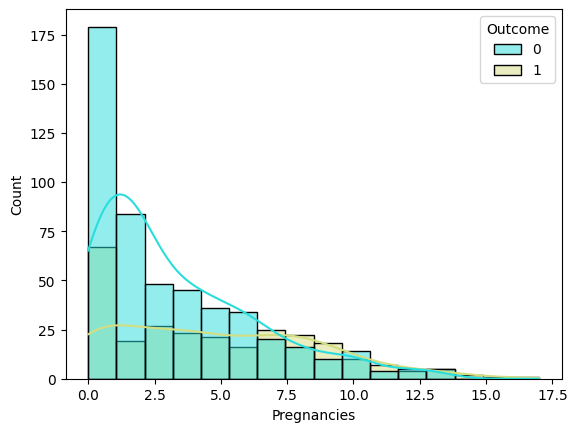

In [19]:
sns.histplot(x="Pregnancies", hue="Outcome", data=dataset, kde=True, palette=random.choice(pallete))

#### Pressão Sanguínia (Blood Pressure) vs Outcome (possuem ou não diabetes)

<Axes: xlabel='BloodPressure', ylabel='Count'>

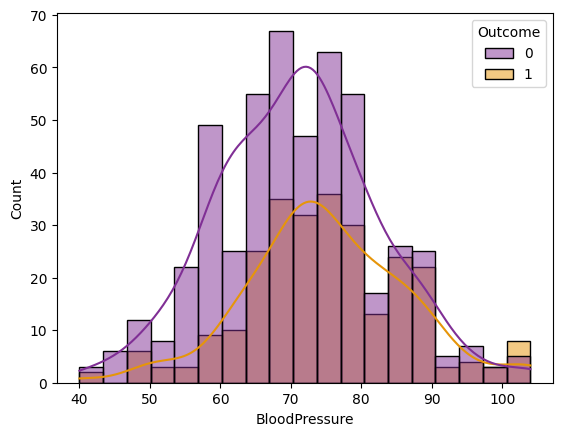

In [20]:
sns.histplot(x="BloodPressure", hue="Outcome", data=dataset, kde=True, palette=random.choice(pallete))

Podemos ver que os níveis de pressão sanguínea das pessoas com diabetes é um pouco mais alto.

#### Glicose (Glucose) vs Outcome (possuem ou não diabetes)

<Axes: xlabel='Glucose', ylabel='Count'>

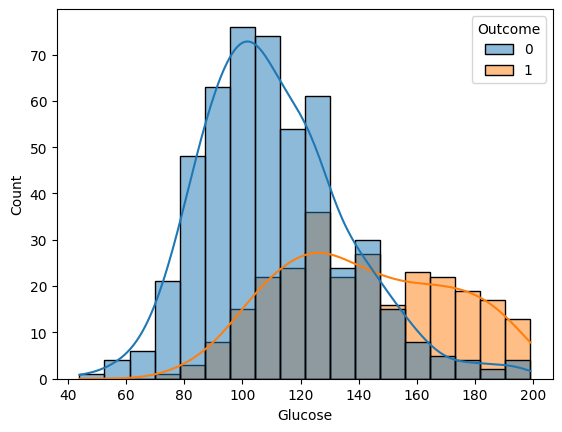

In [21]:
sns.histplot(x="Glucose", hue="Outcome", data=dataset, kde=True)

Podemos ver que os níveis de glicose das pessoas diabéticas é geralmente alto.

#### "Espessura da Pele" ou dobra cutânea (Skin Thickness) vs Outcome (possuem ou não diabetes)

<Axes: xlabel='SkinThickness', ylabel='Count'>

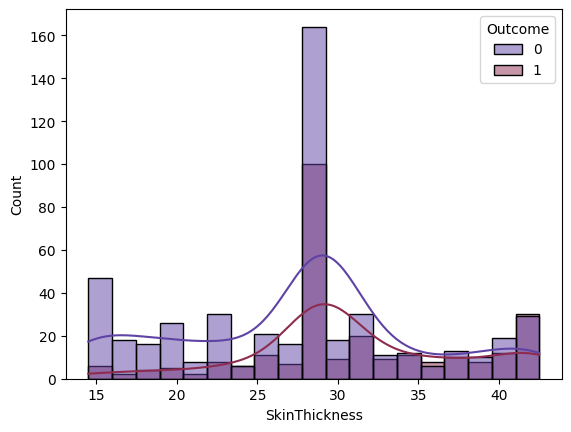

In [22]:
sns.histplot(x="SkinThickness", hue="Outcome", data=dataset, kde=True, palette=random.choice(pallete))

Essa grande quantidade central foi resultado da imputação dos dados.
Podemos ver que pessoas com diabetes tem as dobras cutâneas um pouco maiores (geralmente são pessoas mais obesas).

Na análise de diabetes, o termo "espessura da pele" se refere à medida da espessura da dobra cutânea (também chamada de dobras de pele ou pregas cutâneas). Essa medida é uma avaliação usada para estimar a quantidade de gordura corporal presente em uma determinada área do corpo.

A espessura da pele é geralmente medida com um adipômetro, que é um instrumento que mede a dobra da pele e o tecido adiposo subjacente em diferentes pontos do corpo. Essa medida pode ser usada para estimar a porcentagem de gordura corporal, que pode ser um fator importante para avaliar o risco de diabetes e outras condições relacionadas à obesidade.

No contexto da análise de diabetes, a espessura da pele pode ser considerada um indicador da quantidade de tecido adiposo no corpo, que está frequentemente associada a um risco aumentado de diabetes tipo 2. 

#### Idade (Age) vs Outcome (possuem ou não diabetes)

<Axes: xlabel='Age', ylabel='Count'>

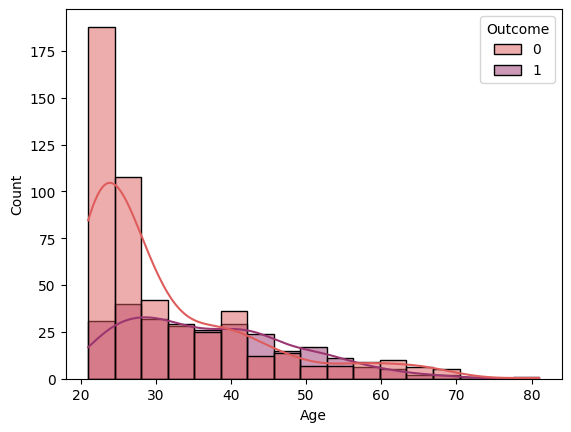

In [23]:
sns.histplot(x="Age", hue="Outcome", data=dataset, kde=True, palette=random.choice(pallete))

Podemos ver que pessoas mais velhas são mais propensas a ter diabetes.

#### IMC (BMI) vs Outcome (possuem ou não diabetes)

<Axes: xlabel='BMI', ylabel='Count'>

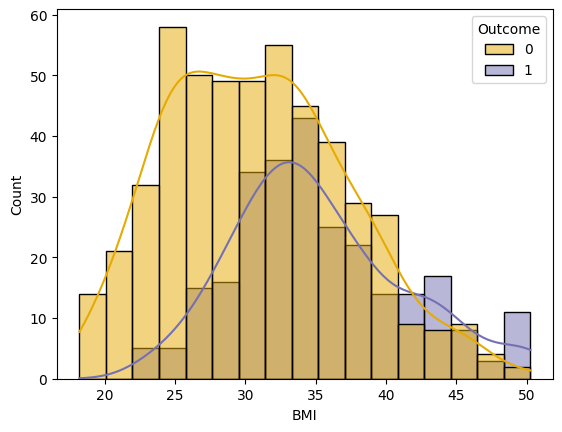

In [24]:
sns.histplot(x="BMI", hue="Outcome", data=dataset, kde=True, palette=random.choice(pallete))

Pessoas com diabetes tem BMI (IMC) mais elevado.

#### Pairplot

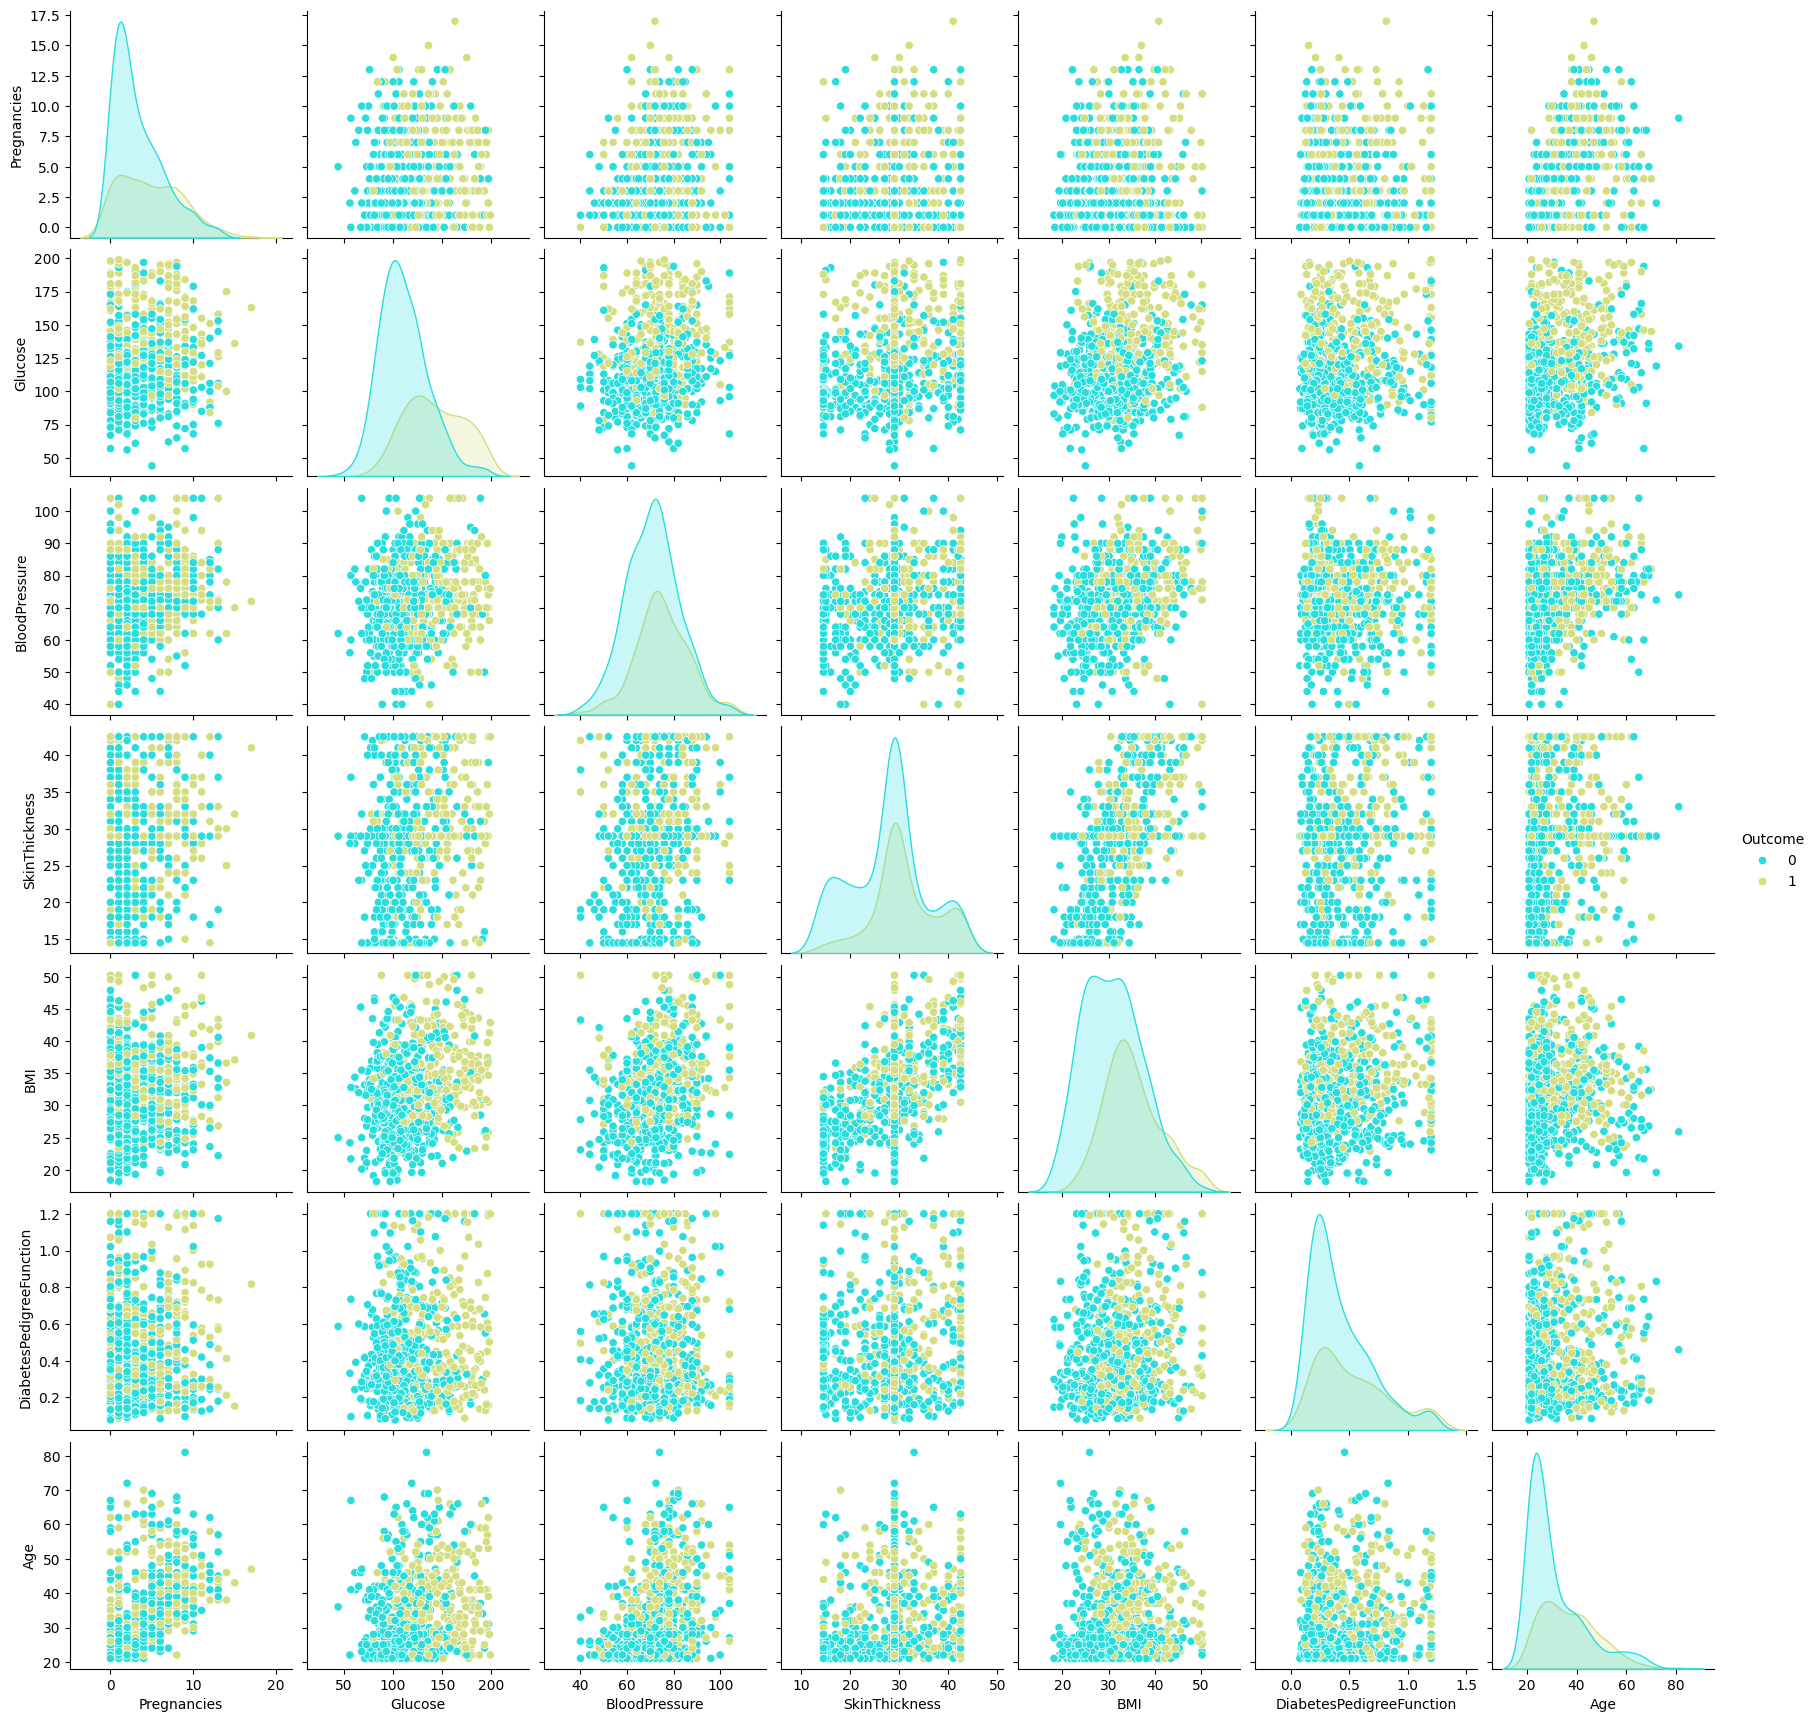

In [25]:
sns.pairplot(dataset, hue='Outcome',palette=random.choice(pallete))

#### Boxplots

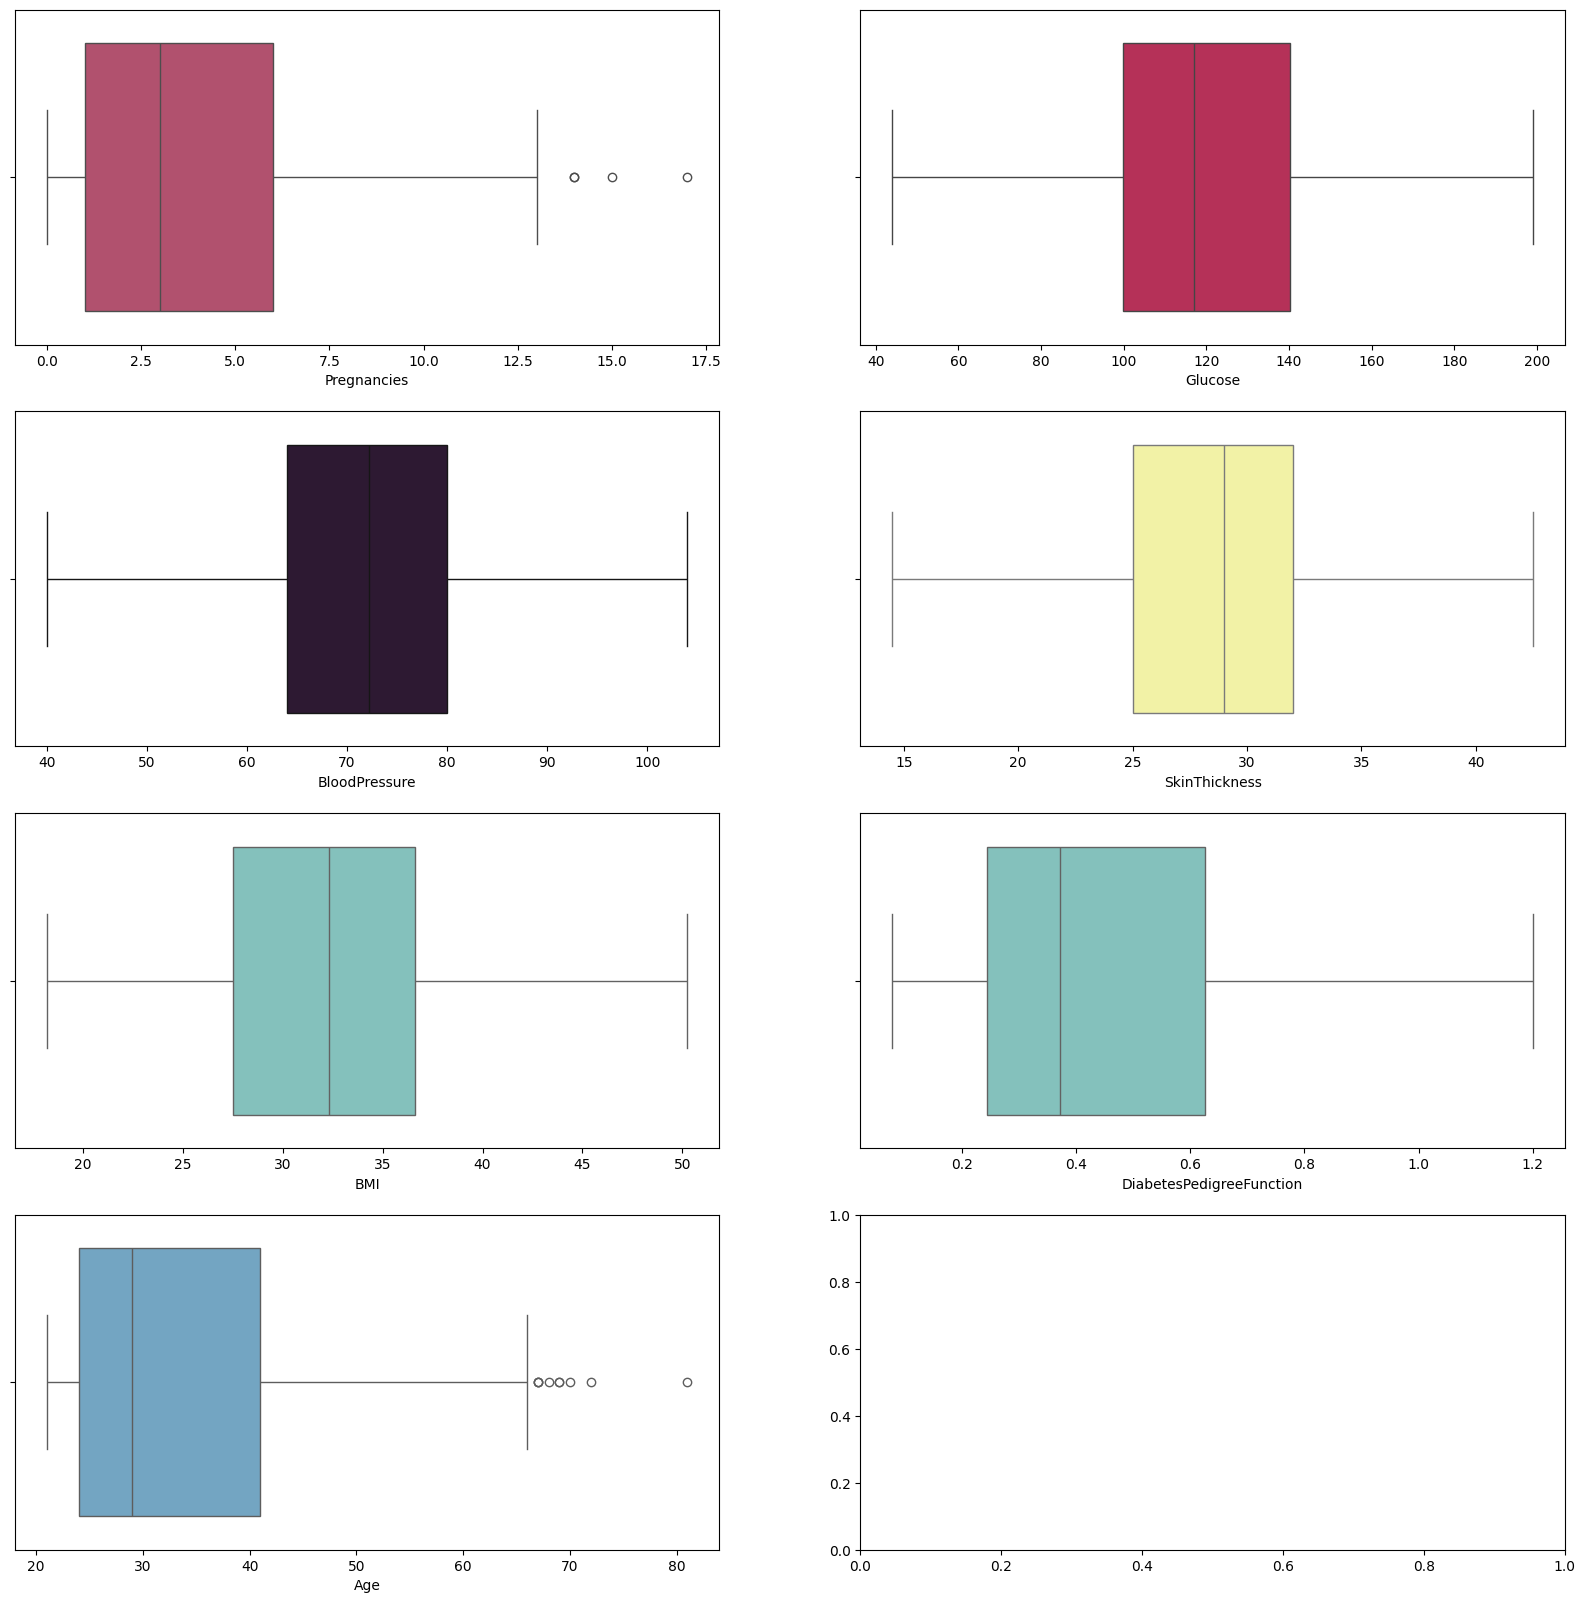

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs = axs.flatten()
for i in range(len(dataset.columns)-1):
    sns.boxplot(data=dataset, x=dataset.columns[i], ax=axs[i], palette=random.choice(pallete))

#### Matriz de Correlação

Text(0.5, 1.0, 'Mapa de Correlação')

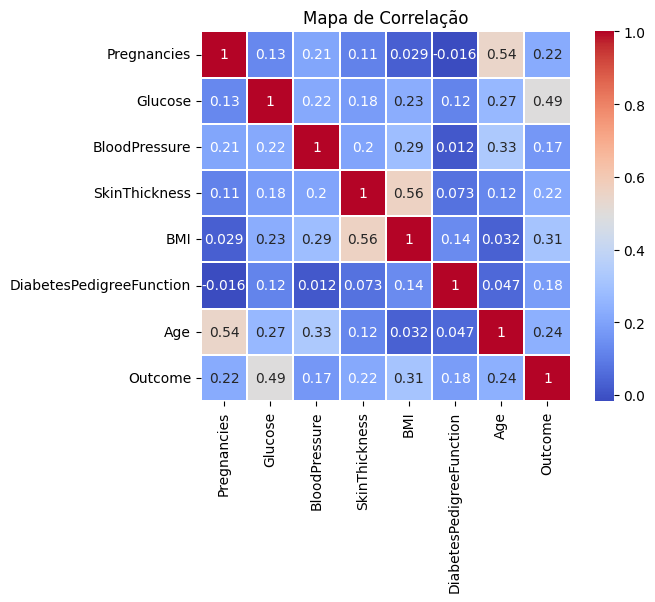

In [27]:
sns.heatmap(dataset.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Mapa de Correlação")

### Salvando os Dados desta Etapa.

In [28]:
# Salvando os dados
dataset.to_csv('data/dataset_limpo.csv')

## Fim do Projeto